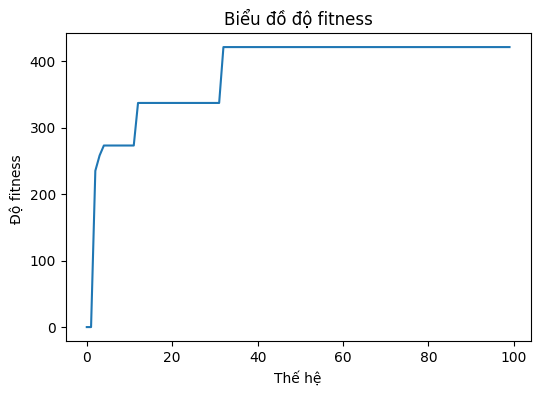

In [1]:
from matplotlib import pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk
import random
import time
 
class KnapsackGUI:
    def __init__(self, master):
        self.master = master
        master.title("Knapsack Problem")
        #
        self.figure = plt.figure(figsize=(6, 4))
        self.canvas = FigureCanvasTkAgg(self.figure, master)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(row=11, column=0, columnspan=2, pady=10)
        # Tạo các widgets
        self.weights_label = tk.Label(master, text="Trọng lượng các vật phẩm:")
        self.weights_entry = tk.Entry(master)
        self.values_label = tk.Label(master, text="Giá trị các vật phẩm:")
        self.values_entry = tk.Entry(master)
        self.capacity_label = tk.Label(master, text="Dung lượng tối đa:")
        self.capacity_entry = tk.Entry(master)
        self.population_size_label = tk.Label(master, text="Kích thước quần thể:")
        self.population_size_entry = tk.Entry(master)
        self.num_generations_label = tk.Label(master, text="Số lượng thế hệ:")
        self.num_generations_entry = tk.Entry(master)
        self.mutation_rate_label = tk.Label(master, text="Tỷ lệ đột biến:")
        self.mutation_rate_entry = tk.Entry(master)
        self.crossover_label = tk.Label(master, text="Chọn phép lai:")
        self.crossover_var = tk.StringVar()
        self.crossover_combobox = ttk.Combobox(master, textvariable=self.crossover_var, values=["One Point Crossover", "Two Points Crossover", "Uniform Crossover"])
        self.mutation_label = tk.Label(master, text="Chọn phép đột biến:")
        self.mutation_var = tk.StringVar()
        self.mutation_combobox = ttk.Combobox(master, textvariable=self.mutation_var, values=["Bit Flip", "Swap Mutate", "Inversion Mutate"])
        self.solve_button = tk.Button(master, text="Giải bài toán", command=self.solve_knapsack)
 
        # Sắp xếp các widget
        self.weights_label.grid(row=0, column=0)
        self.weights_entry.grid(row=0, column=1)
        self.values_label.grid(row=1, column=0)
        self.values_entry.grid(row=1, column=1)
        self.capacity_label.grid(row=2, column=0)
        self.capacity_entry.grid(row=2, column=1)
        self.population_size_label.grid(row=3, column=0)
        self.population_size_entry.grid(row=3, column=1)
        self.num_generations_label.grid(row=4, column=0)
        self.num_generations_entry.grid(row=4, column=1)
        self.mutation_rate_label.grid(row=5, column=0)
        self.mutation_rate_entry.grid(row=5, column=1)
        self.crossover_label.grid(row=6, column=0)
        self.crossover_combobox.grid(row=6, column=1)
        self.mutation_label.grid(row=7, column=0)
        self.mutation_combobox.grid(row=7, column=1)
        self.solve_button.grid(row=8, column=0, columnspan=2)
 
        # Thêm các nhãn để hiển thị kết quả
        self.result_solution_label = tk.Label(master, text="Giải pháp tối ưu:")
        self.result_solution = tk.Label(master, text="", wraplength=300)
        self.result_value_label = tk.Label(master, text="Tổng giá trị:")
        self.result_value = tk.Label(master, text="")
 
        self.result_solution_label.grid(row=9, column=0, sticky="w")
        self.result_solution.grid(row=9, column=1, sticky="w")
        self.result_value_label.grid(row=10, column=0, sticky="w")
        self.result_value.grid(row=10, column=1, sticky="w")
 
    def generate_population(self, size, num_items):
        #Tạo một quần thể các giải pháp ngẫu nhiên.
        return [[random.randint(0, 1) for _ in range(num_items)] for _ in range(size)]
 
    def fitness(self, solution, weights, values, capacity):
        #Tính độ thích nghi của một giải pháp.
        total_weight = sum(weight * item for weight, item in zip(weights, solution))
        total_value = sum(value * item for value, item in zip(values, solution))
        if total_weight > capacity:
            return 0  # Giải pháp không khả thi
        return total_value
     
    #Hàm selection
    # def tournament_selection(self,population, fitness_values, tournament_size=4):
    #     """Thực hiện lựa chọn giải đấu để chọn cha mẹ."""
    #     selected = []
    #     for _ in range(2):  # Chọn 2 cha mẹ
    #         tournament = random.sample(range(len(population)), tournament_size)
    #         best_index = max(tournament, key=lambda i: fitness_values[i])
    #         selected.append(population[best_index])
    #     return selected
    def tournament_selection(self,population, fitness_values, tournament_size=4):
        """Thực hiện lựa chọn giải đấu để chọn cha mẹ."""
        selected = []
        for _ in range(2):  # Chọn 2 cha mẹ
            tournament = random.sample(range(len(population)), tournament_size)
            best_index = max(tournament, key=lambda i: fitness_values[i])
            selected.append(population[best_index])
        return selected


       
    def one_point_crossover(self, parent1, parent2):
        #Thực hiện lai ghép một điểm giữa hai giải pháp cha mẹ.
        crossover_point = random.randint(1, len(parent1) - 1)
        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]
        return child1, child2
 
    def two_points_crossover(self, parent1, parent2):
        #Thực hiện lai ghép hai điểm giữa hai giải pháp cha mẹ.
        point1 = random.randint(1, len(parent1) - 2)
        point2 = random.randint(point1 + 1, len(parent1) - 1)
        child1 = parent1[:point1] + parent2[point1:point2] + parent1[point2:]
        child2 = parent2[:point1] + parent1[point1:point2] + parent2[point2:]
        return child1, child2
 
    def uniform_crossover(self, parent1, parent2):
        #Thực hiện lai ghép đồng nhất giữa hai giải pháp cha mẹ.
        child1 = [parent1[i] if random.random() < 0.5 else parent2[i] for i in range(len(parent1))]
        child2 = [parent2[i] if random.random() < 0.5 else parent1[i] for i in range(len(parent1))]
        return child1, child2
 
    def bit_flip(self, solution, mutation_rate):
        #Thực hiện đột biến bit flip trên một giải pháp.
        for i in range(len(solution)):
            if random.random() < mutation_rate:
                solution[i] = 1 - solution[i]
        return solution
 
    def swap_mutate(self, solution, mutation_rate):
        #Thực hiện đột biến swap trên một giải pháp.
        for _ in range(len(solution)):
            if random.random() < mutation_rate:
                i, j = random.sample(range(len(solution)), 2)
                solution[i], solution[j] = solution[j], solution[i]
        return solution
 
    def inversion_mutate(self, solution, mutation_rate):
        #Thực hiện đột biến đảo đoạn trên một giải pháp.
        if random.random() < mutation_rate:
            start = random.randint(0, len(solution) - 2)
            end = random.randint(start + 1, len(solution))
            solution[start:end] = reversed(solution[start:end])
        return solution
 
    def genetic_algorithm(self, weights, values, capacity, population_size, generations, mutation_rate, crossover_func, mutation_func):
   #Giải bài toán Knapsack 0/1 bằng giải thuật di truyền


        # Khởi tạo quần thể ban đầu
        population = self.generate_population(population_size, len(weights))
 
        # Lưu trữ lịch sử độ fitness của quần thể qua các thế hệ
        fitness_history = []


        # Lưu trữ lịch thoi gian chay của quần thể qua các thế hệ
        time_history = []


        start = time.time()
        for _ in range(generations):
           
            population = sorted(population, key=lambda genome: self.fitness(genome, weights, values, capacity) , reverse=True)
            fitness_history.append(self.fitness(population[0], weights, values, capacity))
           
            new_population =  population[0:4]
            while len(new_population) < population_size:
                fitness_values = [self.fitness(solution, weights, values, capacity) for solution in new_population]
                parent1, parent2 = self.tournament_selection(new_population, fitness_values)
                child1, child2 = crossover_func(parent1, parent2)
                child1 = mutation_func(child1, mutation_rate)
                child2 = mutation_func(child2, mutation_rate)
                new_population.extend([child1, child2])
 
            population = new_population
        end = time.time()  


        best_solution = max(population, key=lambda x: self.fitness(x, weights, values, capacity))
        best_fitness = self.fitness(best_solution, weights, values, capacity)
        return best_solution, best_fitness, fitness_history, (end - start)
 
 
    def solve_knapsack(self):
        weights = [int(x) for x in self.weights_entry.get().split(",")]
        values = [int(x) for x in self.values_entry.get().split(",")]
        capacity = int(self.capacity_entry.get())
        population_size = int(self.population_size_entry.get())
        num_generations = int(self.num_generations_entry.get())
        mutation_rate = float(self.mutation_rate_entry.get())
        crossover_method = self.crossover_var.get()
        mutation_method = self.mutation_var.get()
 
        crossover_func_map = {
            "One Point Crossover": self.one_point_crossover,
            "Two Points Crossover": self.two_points_crossover,
            "Uniform Crossover": self.uniform_crossover
        }
 
        mutation_func_map = {
            "Bit Flip": self.bit_flip,
            "Swap Mutate": self.swap_mutate,
            "Inversion Mutate": self.inversion_mutate
        }
 
        crossover_func = crossover_func_map[crossover_method]
        mutation_func = mutation_func_map[mutation_method]
 
        best_solution, best_fitness, fitness_history, time_taken = self.genetic_algorithm(
            weights, values, capacity, population_size, num_generations, mutation_rate, crossover_func, mutation_func
        )
        self.result_solution.config(text=str(best_solution))
        self.result_value.config(text=str(best_fitness))
 


        self.update_plot = True
        # Cập nhật biểu đồ
        if self.update_plot:
            self.update_plot_canvas(fitness_history)
 
        # Đặt lại biến để cập nhật biểu đồ trong lần chạy tiếp theo
        self.update_plot = True
 
    def update_plot_canvas(self, fitness_history):
        self.figure.clear()
        plt.plot(fitness_history)
        plt.xlabel("Thế hệ")
        plt.ylabel("Độ fitness ")
        plt.title("Biểu đồ độ fitness")
        self.canvas.draw()
    def solve_knapsack_button_click(self):
        self.update_plot = True
        self.solve_knapsack()
 
if __name__ == "__main__":
    root = tk.Tk()
    knapsack_gui = KnapsackGUI(root)
    root.mainloop()


 





Chạy form: 
Trọng lượng các vật phẩm:

59, 8, 72, 29, 53, 67, 39, 62, 73, 69, 17, 59, 82, 72, 57, 81, 94, 33, 79, 72

Giá trị các vật phẩm:

22, 2, 86, 93, 84, 42, 6, 15, 79, 56, 19, 10, 14, 43, 83, 69, 39, 75, 68, 45

Dung lượng tối đa: 250
Kích thước quần thể 100
Số lượng thế hệ 100
Tỷ lệ đột biến 0.2